# 尝试分析前面的部分特征
## 先从机器学习的那几个重要特征开始

In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-bright")
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False  
import numpy as np 
import pandas as pd
import cv2

In [2]:
train=pd.read_csv("train_all_features_noPCA-3.csv",index_col=0)
train.loc[:,"1":].shape

(6844, 497)

In [3]:
def Show(id):
    """展示对应的图片"""
    print("id:",train.loc[id,"product_id"])
    print("price:",train.loc[id,"price"])
    path="mydata/train/"+str(train.loc[id,"product_id"])+".jpg"
    img=cv2.imread(path)
    plt.imshow(img)#,cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show();
def Inter(idx,倍数=10):
    for i in train.loc[train.loc[:,idx]>倍数*np.mean(np.abs(train.loc[:,idx])),idx].index:
        print(train.loc[i,"product_id"])
        Show(i)

5234
id: 5234
price: 1354.598


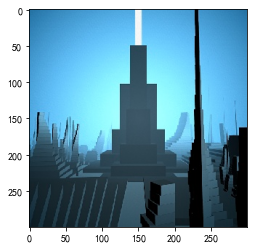

5475
id: 5475
price: 0.225888


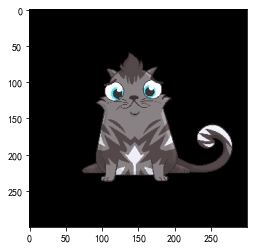

5654
id: 5654
price: 0.356916


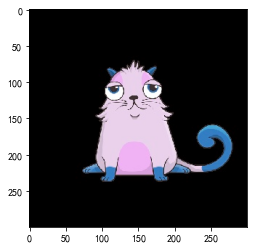

2000
id: 2000
price: 0.178394


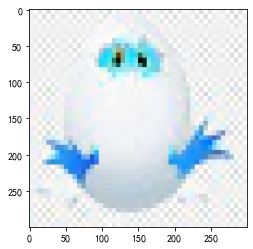

2277
id: 2277
price: 165.148


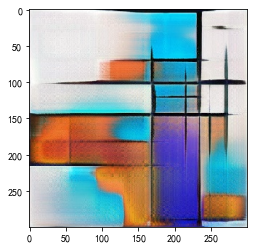

1772
id: 1772
price: 158.834


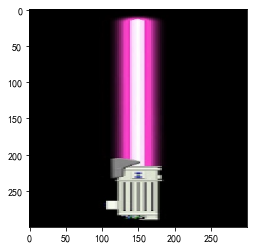

6507
id: 6507
price: 812.585


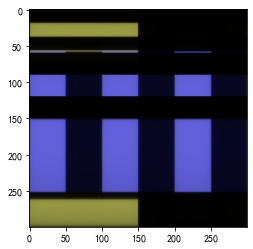

6893
id: 6893
price: 2987.418


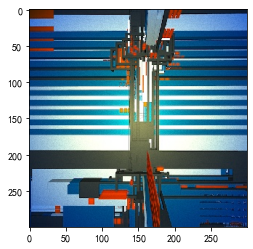

4612
id: 4612
price: 1.665576


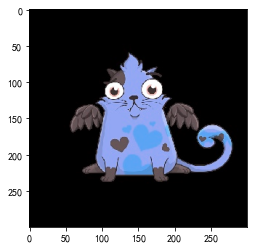

5237
id: 5237
price: 867.67065


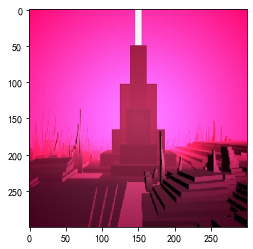

6885
id: 6885
price: 2133.87


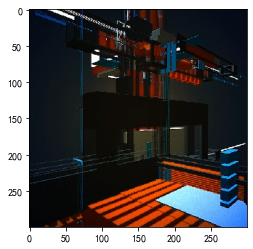

6346
id: 6346
price: 0.1602348


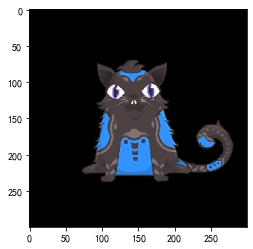

3045
id: 3045
price: 11.395212


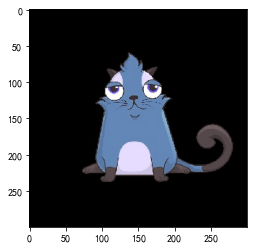

5186
id: 5186
price: 1817.48


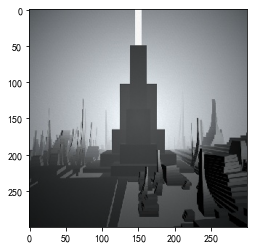

963
id: 963
price: 10.04595


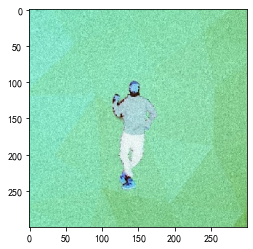

3180
id: 3180
price: 5069.5464


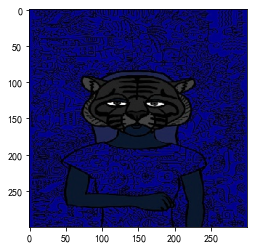

370
id: 370
price: 7035.7246


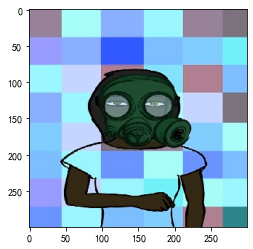

In [4]:
Inter("392",倍数=5)

* 特征"392"偏高的图片给人一种深沉、压抑的感觉，背景以黑色或白色这种单调的色彩为主，色彩对比度不明显，“灰色光柱”和“黑色猫”是主要的图片

6875
id: 6875
price: 2733.3752


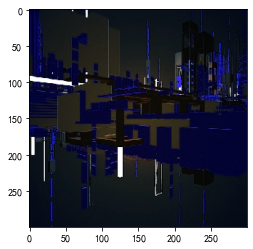

6877
id: 6877
price: 743.166


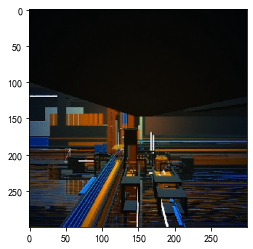

5219
id: 5219
price: 1752.276


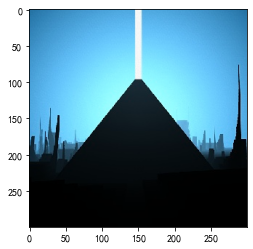

5233
id: 5233
price: 1171.924


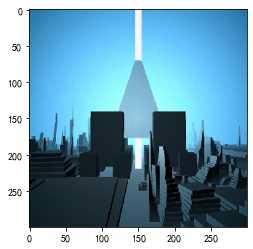

5207
id: 5207
price: 683.6193


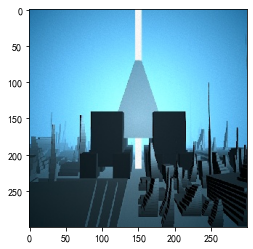

2007
id: 2007
price: 51.73426


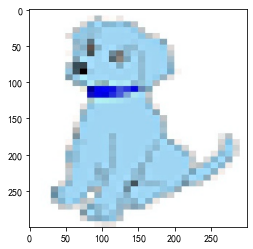

5225
id: 5225
price: 3250.34


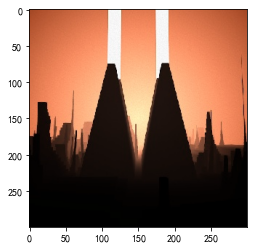

5193
id: 5193
price: 742.7344


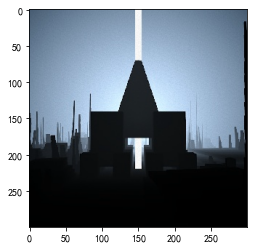

7159
id: 7159
price: 1333.776


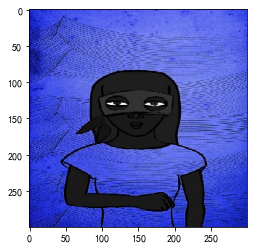

5197
id: 5197
price: 1511.3595


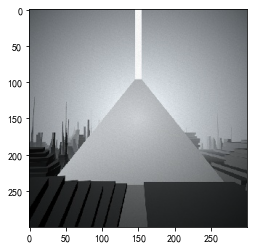

4311
id: 4311
price: 1427.269


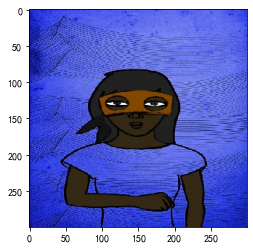

482
id: 482
price: 25.212


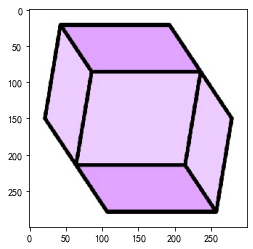

In [5]:
Inter("455",倍数=7)

* 特征“455”普遍选择了有、色调阴暗的图片，同时和392相比，还选择了线条更复杂的图像，比如发光的三角塔，还有蒙面女郎像。
* 这些特征直观来看价格比较高，处于中位数以上

6448
id: 6448
price: 1388.355


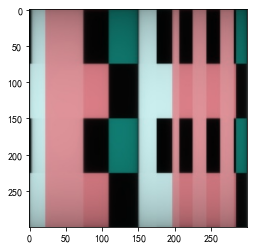

6513
id: 6513
price: 703.4332


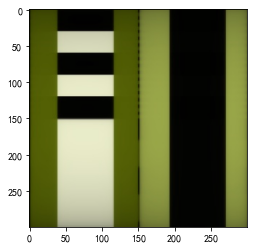

5861
id: 5861
price: 341.2857


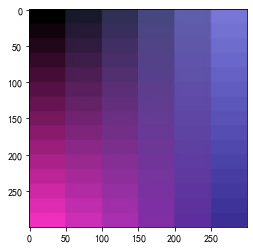

6457
id: 6457
price: 577.4537


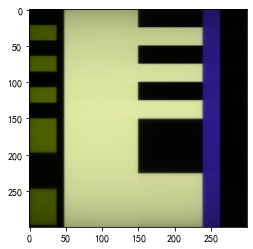

6482
id: 6482
price: 812.585


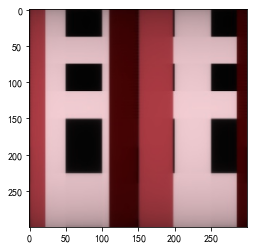

5914
id: 5914
price: 613.9259


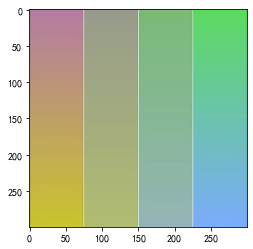

2176
id: 2176
price: 104.2069


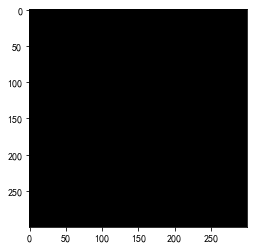

482
id: 482
price: 25.212


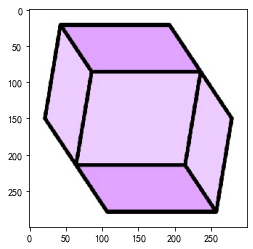

1073
id: 1073
price: 60.7965


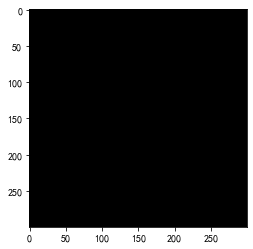

5750
id: 5750
price: 296.1824


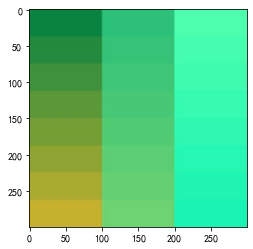

In [6]:
Inter("300",倍数=15)

* 特征“300”主要的特征是颜色上偏向于鲜艳、渐变、特征“300”高的图片在横竖分隔上只突出一个方向，要么突出横向，要么突出纵向。

## 展示cv2角点和人脸

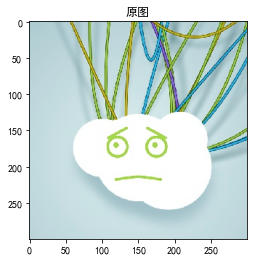

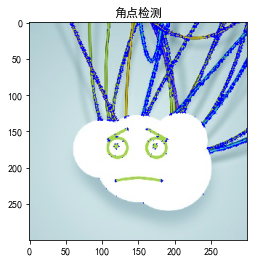

In [7]:
img=cv2.imread("mydata/train/30.jpg")
plt.imshow(img);
plt.title("原图");
plt.show();
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray,2,3,0.04)
# dst = cv2.dilate(dst,None)
img[dst>0.001*dst.max()] = [0,0,255]
plt.imshow(img);
plt.title("角点检测")
plt.show();

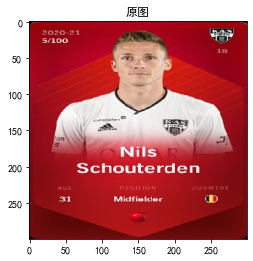

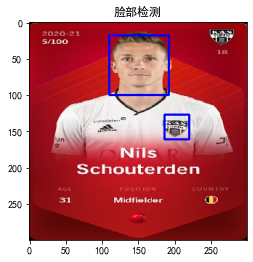

In [8]:
def face_detect_demo(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #在灰度图像基础上实现的
    face_detector = cv2.CascadeClassifier("D:/Anaconda/lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")  #级联检测器获取文件
    faces = face_detector.detectMultiScale(gray,1.01,1)    #在多个尺度空间上进行人脸检测
    #第一个参数是灰度图像
    #第二个参数是尺度变换，就是向上或者向下每次是原来的多少倍，这里是1.02倍
    #第三个参数是人脸检测次数，设置越高，误检率越低，但是对于迷糊图片，我们设置越高，越不易检测出来，要试单降低
    for x,y,w,h in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    # cv2.namedWindow("xdy",0)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB));
    plt.title("脸部检测");
    plt.show();
#
#
#
src = cv2.imread("mydata/train//1343.jpg")  #读取图片

# cv2.namedWindow("input image",0)    
plt.imshow(cv2.cvtColor(src,cv2.COLOR_BGR2RGB));
plt.title("原图")
plt.show();
# p=cv2.Canny(src,200,200)
face_detect_demo(src)
 # cv2.imshow("p image",p)